In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [243]:
file = 'Sheet_1_data_rateby-maleandfemale-education.csv'
df  = pd.read_csv(file,delimiter=',', error_bad_lines=False,lineterminator='\n')

data_list_n = {
    'High school or less':0 , 'Some college':0, "Associate's degree":0, "Bachelor's degree or higher":0
}
data_list_v = {
    'High school or less':0 , 'Some college':0, "Associate's degree":0, "Bachelor's degree or higher":0
}

na = df['Gender'].values.tolist()
pl = df['Percent unemployed\r'].values.tolist()
z = 0
for i in pl:
    z+=i

xeu = df['Educational attainment'].values.tolist()
labels = df['Educational attainment'].drop_duplicates().values.tolist()

for i,j in enumerate(xeu):
    if na[i] == 'Female':
        data_list_v[j]+=pl[i]
    else:
        data_list_n[j]+=pl[i]


for key,value in data_list_v.items():
       data_list_v[key]= float("%.2f" % ((value/z)*100))
for key,value in data_list_n.items():
       data_list_n[key]= float("%.2f" % ((value/z)*100))

print(data_list_v)
print(data_list_n)

{'High school or less': 17.34, 'Some college': 15.37, "Associate's degree": 11.66, "Bachelor's degree or higher": 8.1}
{'High school or less': 15.73, 'Some college': 13.71, "Associate's degree": 10.8, "Bachelor's degree or higher": 7.29}


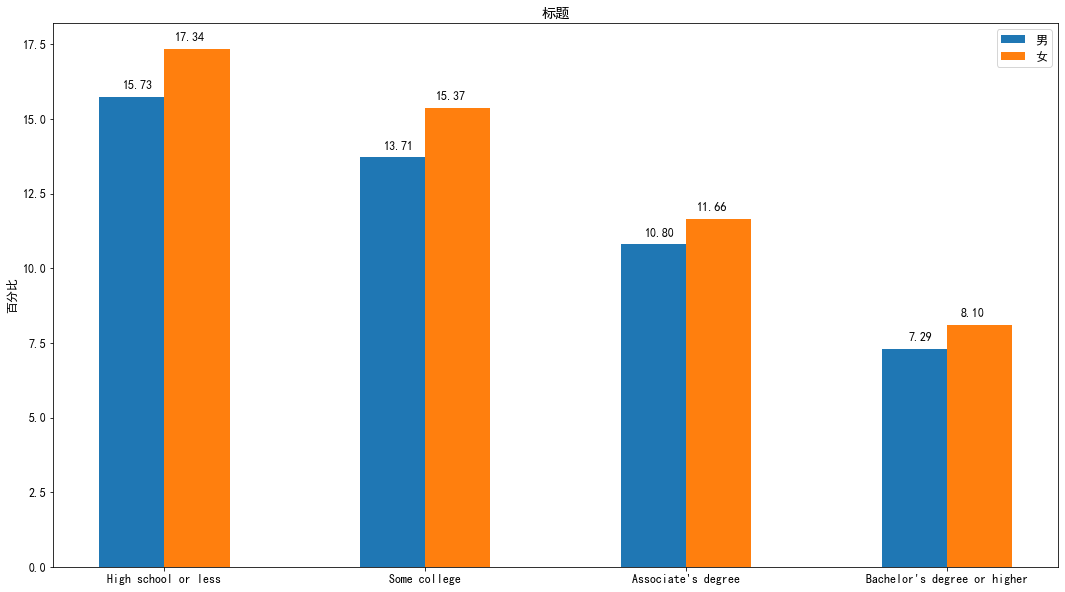

In [244]:
plt.figure(figsize=(18, 10))
# 构造x轴刻度标签、数据

first = [x for x in data_list_n.values()]
second = [x for x in data_list_v.values()]

x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, first, width, label='男')
plt.bar(x + width/2, second, width, label='女')
plt.ylabel('Percent Unployment')
plt.title('influences of sex and education')
# x轴刻度标签位置不进行计算

for X,y in zip(x,first):
    plt.text(X-0.1,y+0.2,'%.2f' %y, ha='center',va='bottom')

for X, y in zip(x, second):
    plt.text(X+0.1,y+0.2,'%.2f'%y, ha='center',va='bottom')
plt.legend(loc='upper right')
plt.xticks(x, labels=labels)

plt.show()